# Exercise Twelve: Texts, Three Ways
For this week, you will sample the three methods we've explored (topic modeling, sentiment analysis, and Markov chain generation) using the same set of root texts.

- Collect and import ten documents (novels work best, but anything goes!)
- Using the topic modeling code as a starter, build a topic model of the documents
- Using the sentiment analysis code as a starter, run a sentiment analysis on sample fragments from the documents and compare
- Using the Markov chain code as a starter, generate a sentence using one of the documents
- Using the Markov chain code as a starter, generate a longer text fragment using all of the documents

As a bonus, try to extend this analysis to note other features of these documents using any of our previous exercises as a starting point.

(Karsdorp, Kestemont, and Riddell).


## Stage One: Collect and import ten documents (novels work best, but anything goes!)

(Karsdorp, Kestemont, and Riddell).

In [22]:
import wikipedia
import os
path = "directors/"

In [23]:
directors = ["Steven Spielberg", "George Lucas", "Martin Scorsese","M. Night Shyamalan"]
for director in directors:
    page = wikipedia.page(director)
    print(page.title)
    filename = path + director.replace(" ","_") + ".txt"
    with open (filename, "w", encoding="utf-8", errors="ignore") as f:
        f.write(page.content)
        f.close()

Steven Spielberg
George Lucas
Martin Scorsese
M. Night Shyamalan


## Stage Two: Using the topic modeling code as a starter, build a topic model of the documents

(Karsdorp, Kestemont, and Riddell).

In [24]:
import pandas as pd
import os
import numpy as np

documents = []
path = 'directors/'

filenames=sorted([os.path.join(path, fn) for fn in os.listdir(path)])
print(len(filenames)) # count files in corpus
print(filenames[:10]) # print names of 1st ten files in corpus

9
['directors/Annalee_Newitz.txt', 'directors/Charlie_Jane_Anders.txt', 'directors/George_Lucas.txt', 'directors/M._Night_Shyamalan.txt', 'directors/Martin_Scorsese.txt', 'directors/N.K._Jemisin.txt', 'directors/Octavia_Butler.txt', 'directors/Steven_Spielberg.txt', 'directors/Terry_Pratchett.txt']


In [27]:
import sklearn.feature_extraction.text as text

vectorizer=text.CountVectorizer(input='filename', stop_words="english", min_df=1)
dtm=vectorizer.fit_transform(filenames).toarray() # defines document term matrix

vocab=np.array(vectorizer.get_feature_names())

In [28]:
print(f'Shape of document-term matrix: {dtm.shape}. '
      f'Number of tokens {dtm.sum()}')

Shape of document-term matrix: (9, 7499). Number of tokens 28932


In [29]:
import sklearn.decomposition as decomposition
model = decomposition.LatentDirichletAllocation(
    n_components=100, learning_method='online', random_state=1)
document_topic_distributions = model.fit_transform(dtm)
vocabulary = vectorizer.get_feature_names()
# (# topics, # vocabulary)
assert model.components_.shape == (100, len(vocabulary))
# (# documents, # topics)
assert document_topic_distributions.shape == (dtm.shape[0], 100)  

In [30]:
topic_names = [f'Topic {k}' for k in range(100)]
topic_word_distributions = pd.DataFrame(
    model.components_, columns=vocabulary, index=topic_names)
print(topic_word_distributions)

               000  0062204707  0252061400  0316257442  0345428820  \
Topic 0   0.252348    0.192002    0.193936    0.183507    0.240053   
Topic 1   0.190504    0.229625    0.184539    0.192885    0.234721   
Topic 2   0.183396    0.277025    0.179138    0.196688    0.195428   
Topic 3   0.215287    0.187759    0.225343    0.210820    0.176906   
Topic 4   0.220765    0.209736    0.212831    0.195774    0.179070   
...            ...         ...         ...         ...         ...   
Topic 95  0.225641    0.218522    0.176585    0.200255    0.207456   
Topic 96  0.216122    0.190335    0.202306    0.212668    0.257152   
Topic 97  0.211282    0.190002    0.157446    0.187719    0.217315   
Topic 98  0.218253    0.201310    0.205682    0.208527    0.179065   
Topic 99  0.227561    0.201140    0.195136    0.198051    0.200457   

          0345428844  0345455741  0345475732  0345494764  0345511294  ...  \
Topic 0     0.189246    0.233899    0.166114    0.226889    0.183011  ...   
Topic

In [31]:
topic_word_distributions.loc['Topic 9'].sort_values(ascending=False).head(18)

butler        0.652679
spielberg     0.406311
science       0.360729
octavia       0.342651
fiction       0.328663
best          0.313350
american      0.297757
visually      0.290717
70            0.290164
series        0.283698
driven        0.282595
pp            0.281644
2005          0.278574
film          0.278354
eliminates    0.277193
necessary     0.277192
29            0.276751
california    0.275953
Name: Topic 9, dtype: float64

000           0.183396
0062204707    0.277025
0252061400    0.179138
0316257442    0.196688
0345428820    0.195428
0345428844    0.226513
0345455741    0.176898
0345475732    0.186382
0345494764    0.225682
0345511294    0.190411
036           0.188647
0385535922    0.199935
0393652673    0.191202
0431906335    0.194171
05            0.188193
0517546772    0.196009
08            0.177456
0810949683    0.201592
0814757925    0.208395
0822337454    0.221442
Name: Topic 2, dtype: float64


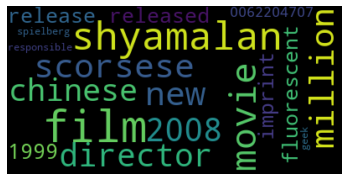

In [32]:
words = topic_word_distributions.loc['Topic 2'].sort_values(ascending=False).head(18)
words 

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

print(topic_word_distributions.loc['Topic 2'].head(20))

# Create and generate a word cloud image:
wordcloud = WordCloud().generate_from_frequencies(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

000           0.183396
0062204707    0.277025
0252061400    0.179138
0316257442    0.196688
0345428820    0.195428
0345428844    0.226513
0345455741    0.176898
0345475732    0.186382
0345494764    0.225682
0345511294    0.190411
036           0.188647
0385535922    0.199935
0393652673    0.191202
0431906335    0.194171
05            0.188193
0517546772    0.196009
08            0.177456
0810949683    0.201592
0814757925    0.208395
0822337454    0.221442
Name: Topic 2, dtype: float64


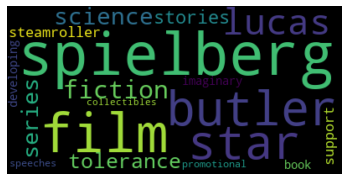

In [33]:
words = topic_word_distributions.loc['Topic 4'].sort_values(ascending=False).head(18)
words 

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

print(topic_word_distributions.loc['Topic 2'].head(20))

# Create and generate a word cloud image:
wordcloud = WordCloud().generate_from_frequencies(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [34]:
words = topic_word_distributions.loc['Topic 9'].sort_values(ascending=False).head(18)
words 

butler        0.652679
spielberg     0.406311
science       0.360729
octavia       0.342651
fiction       0.328663
best          0.313350
american      0.297757
visually      0.290717
70            0.290164
series        0.283698
driven        0.282595
pp            0.281644
2005          0.278574
film          0.278354
eliminates    0.277193
necessary     0.277192
29            0.276751
california    0.275953
Name: Topic 9, dtype: float64

000           0.183396
0062204707    0.277025
0252061400    0.179138
0316257442    0.196688
0345428820    0.195428
0345428844    0.226513
0345455741    0.176898
0345475732    0.186382
0345494764    0.225682
0345511294    0.190411
036           0.188647
0385535922    0.199935
0393652673    0.191202
0431906335    0.194171
05            0.188193
0517546772    0.196009
08            0.177456
0810949683    0.201592
0814757925    0.208395
0822337454    0.221442
Name: Topic 2, dtype: float64


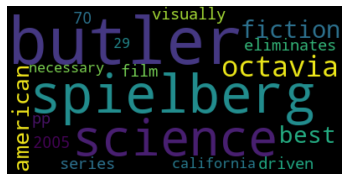

In [35]:


from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

print(topic_word_distributions.loc['Topic 2'].head(20))

# Create and generate a word cloud image:
wordcloud = WordCloud().generate_from_frequencies(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Stage Three: Using the sentiment analysis code as a starter, run a sentiment analysis on sample fragments from the documents and compare

(Karsdorp, Kestemont, and Riddell).

In [36]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dlawb\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dlawb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [37]:
for filename in filenames:
    with open(filename, encoding="utf-8") as f:
        text = f.read()
        documents.append(text)
        scores = sid.polarity_scores(text[0:500])
    print(filename)
    for key in sorted(scores):
        print('{0}: {1}, '.format(key, scores[key]), end='')
    print(' ')

directors/Annalee_Newitz.txt
compound: 0.4215, neg: 0.0, neu: 0.964, pos: 0.036,  
directors/Charlie_Jane_Anders.txt
compound: 0.9601, neg: 0.022, neu: 0.762, pos: 0.216,  
directors/George_Lucas.txt
compound: 0.8714, neg: 0.04, neu: 0.812, pos: 0.148,  
directors/M._Night_Shyamalan.txt
compound: 0.296, neg: 0.077, neu: 0.822, pos: 0.101,  
directors/Martin_Scorsese.txt
compound: 0.6801, neg: 0.064, neu: 0.82, pos: 0.116,  
directors/N.K._Jemisin.txt
compound: 0.8271, neg: 0.083, neu: 0.752, pos: 0.165,  
directors/Octavia_Butler.txt
compound: -0.3384, neg: 0.068, neu: 0.894, pos: 0.038,  
directors/Steven_Spielberg.txt
compound: 0.9738, neg: 0.0, neu: 0.751, pos: 0.249,  
directors/Terry_Pratchett.txt
compound: 0.9062, neg: 0.0, neu: 0.851, pos: 0.149,  


## Stage Four: Using the Markov chain code as a starter, generate a sentence using one of the documents

(Karsdorp, Kestemont, and Riddell).

In [38]:
import markovify
import random
generator_text = ""

for document in documents:
    generator_text += document

In [39]:
text_model = markovify.Text(text)
print( text_model.make_sentence() )

Neil Gaiman was involved with the condition for the Children's Circle section under the name Uncle Jim.


## Stage Five: Using the Markov chain code as a starter, generate a longer text fragment using all of the documents

(Karsdorp, Kestemont, and Riddell).

In [40]:
novel = ''
while (len( novel.split(" ")) < 500):
  for i in range(random.randrange(3,9)):
    novel += text_model.make_sentence() + " "
  novel += "\n\n"

print(novel)

Discussing his diagnosis at the time of his books occupied top places on the best-seller list; he was a keen astronomer from childhood. In this position he wrote, among other things, over 80 stories for the Training of Journalists proficiency course. His first computer he used properly for writing as soon as they were available to him. 

Pratchett also included further parody as a child and donated the income from the event to it. === Style and themes === Pratchett sponsored a biennial award for unpublished science fiction conventions from about 1963–1964, but stopped a few years before, which doctors believed had damaged the right side of his books. A second novel, The Carpet People in 1971, which Pratchett wrote an average of two books a year. His first computer he used properly for writing as soon as they were available to him. 

In 2016, SFWA announced that Sir Terry would be the recipient of the first Discworld book marketed for children. This was followed by another collection, T

## Bonus Stage: Try to extend this analysis to note other features of these documents using any of our previous exercises as a starting point.

(Karsdorp, Kestemont, and Riddell).

